Importing Necessary python Library

Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing pandas & Numpy Library for data Exploring and analysis
import pandas as pd
import numpy as np

# importing Library for data-preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, LabelEncoder

# importing machine-learning algorithms for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Grid Search CV import
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score # for K-fold Cross - validtion
from sklearn.model_selection import KFold # for K-fold Cross - validtion

# train-test Split
from sklearn.model_selection import train_test_split

# Performance Metrice
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score,classification_report,f1_score

# importing for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading**

In [4]:
df = pd.read_csv('pima_indian_diabetese.csv')

# Display Dataset

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Loaded Data Check

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Check statistical type

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Check data has any null value or not

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Get the name of features

In [9]:
list(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# Check the outcome in bar plot

<Axes: xlabel='Outcome'>

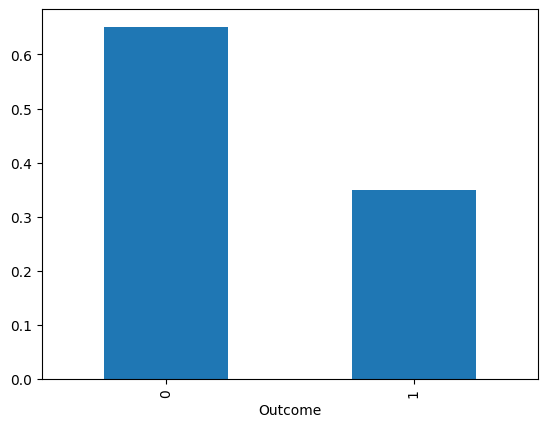

In [10]:
df['Outcome'].value_counts(normalize=True).plot(kind='bar')

# Check Skewness

In [11]:
df.skew(axis=0)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

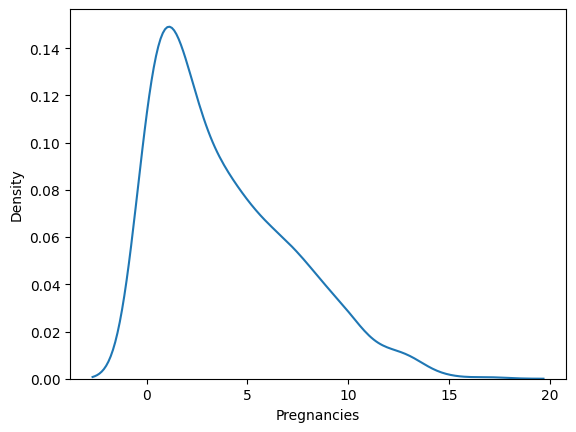

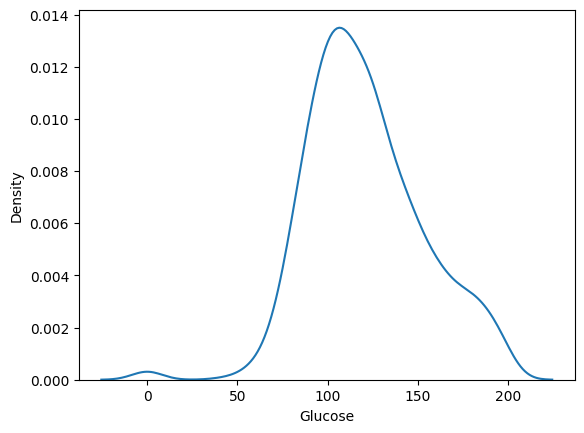

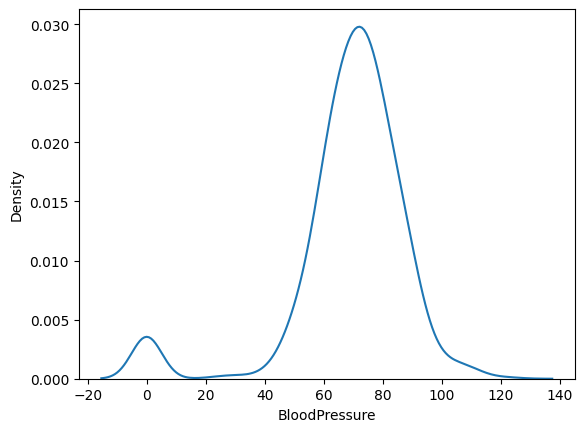

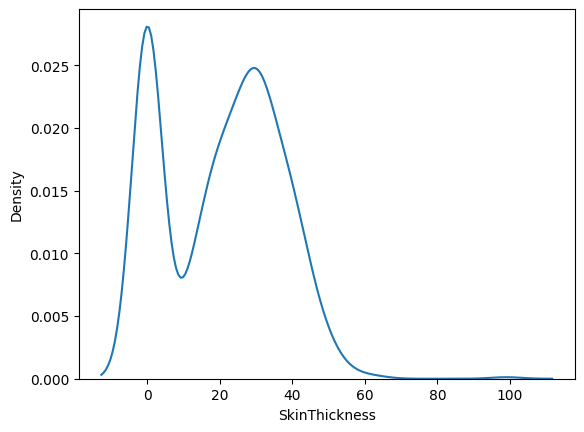

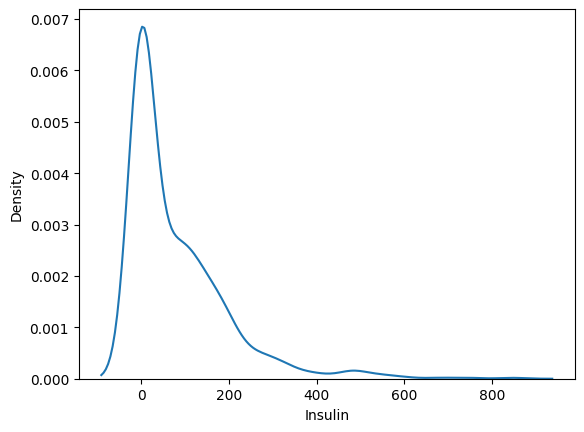

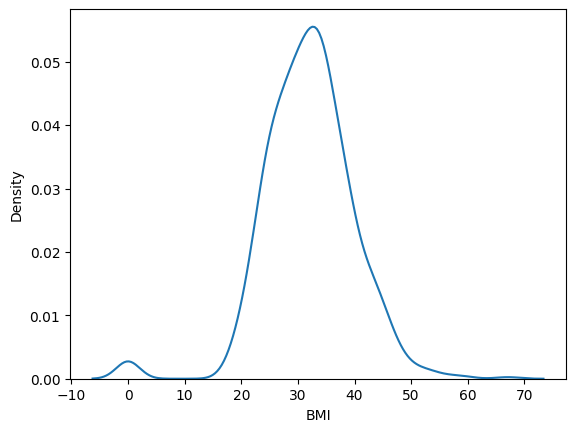

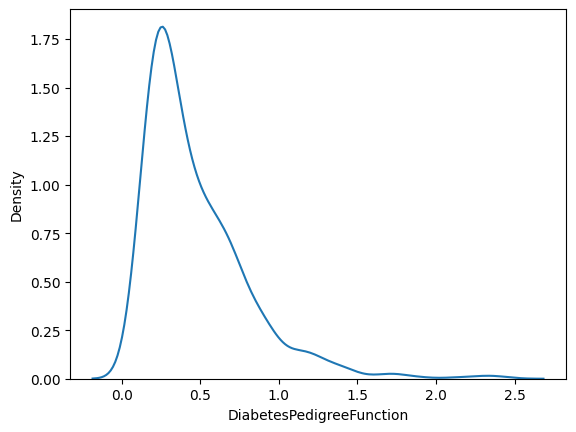

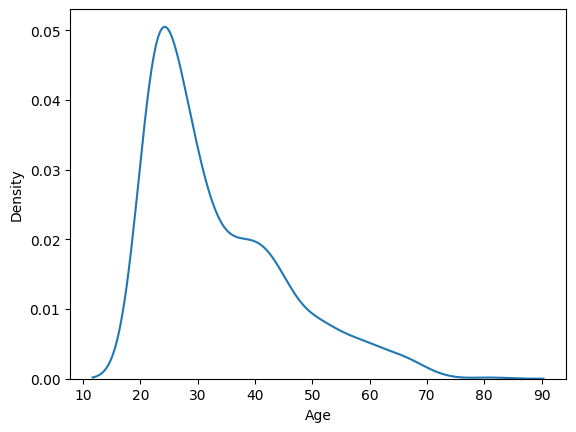

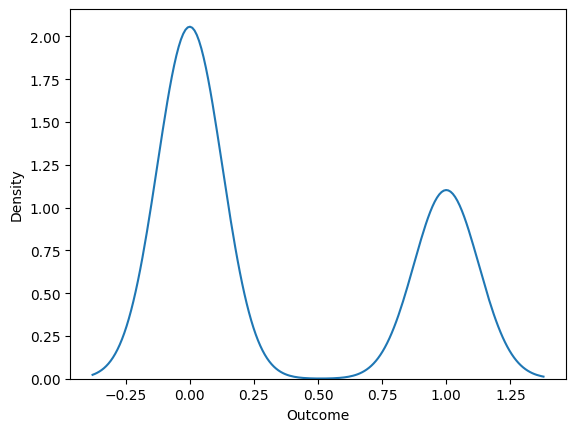

In [12]:
for colname in list(df):
  sns.kdeplot(df[colname])
  plt.show()

# Best Model Fitting

In [13]:
preprocessor = {
    'StandardScaler':StandardScaler(),
    'MinMaxScaler':MinMaxScaler(),
    'MaxAbsScaler':MaxAbsScaler(),
    'NotProcessing' : 'NotProcessing'
}

In [14]:
# cheking the key-value pair in preprocessor

for key_ in preprocessor:
  print(key_,preprocessor[key_])

StandardScaler StandardScaler()
MinMaxScaler MinMaxScaler()
MaxAbsScaler MaxAbsScaler()
NotProcessing NotProcessing


In [15]:
ml_algorithms = {
    'RandomForest' : RandomForestClassifier(random_state=42),
    'DecisionTree' : DecisionTreeClassifier(random_state=42),
    'KNearestNeighbor' : KNeighborsClassifier(),
    'LogisticRegression' : LogisticRegression(random_state=42)
}

In [16]:
#cheking key-value pair in algorithm

for key_ in ml_algorithms:
  print(key_,ml_algorithms[key_])

RandomForest RandomForestClassifier(random_state=42)
DecisionTree DecisionTreeClassifier(random_state=42)
KNearestNeighbor KNeighborsClassifier()
LogisticRegression LogisticRegression(random_state=42)


In [17]:
ml_algorithms_param = {
    'DecisionTree' : {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2,4,6,8,10],
    'max_features' : ['sqrt','log2',None]
},
    'RandomForest' : {
    'criterion' : ['gini','entropy', 'log_loss'],
    'n_estimators' : [200,400,600]
},
    'KNearestNeighbor' : {
    'n_neighbors': [3,5,7,9,11,13,15,17,19],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
},

    'LogisticRegression' : {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty':['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10]
  }
}

In [18]:
for key_ in ml_algorithms_param:
  print(key_,ml_algorithms_param[key_])

DecisionTree {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [2, 4, 6, 8, 10], 'max_features': ['sqrt', 'log2', None]}
RandomForest {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [200, 400, 600]}
KNearestNeighbor {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
LogisticRegression {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}


In [19]:
for key_ in ml_algorithms:
  print(key_,ml_algorithms_param[key_])

RandomForest {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [200, 400, 600]}
DecisionTree {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [2, 4, 6, 8, 10], 'max_features': ['sqrt', 'log2', None]}
KNearestNeighbor {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
LogisticRegression {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}


In [20]:
collen = len(list(df))

In [22]:
all_results = []

for preprocessing_key_ in preprocessor:

  #separate Feature & target Variable
  X = df.values[:,0:collen-1]
  y = df.values[:,collen-1]

  if preprocessing_key_ != 'NotProcessing':
    # pre-processing value with pre-processor
    scaler = preprocessor[preprocessing_key_]
    scaler.fit(X)
    X = scaler.transform(X)

  for ml_algo_param_key_ in ml_algorithms:

    result = []

    ml_class = ml_algorithms[ml_algo_param_key_]
    ml_param = ml_algorithms_param[ml_algo_param_key_]

    # call grid Search CV class
    grid_cv = GridSearchCV(estimator=ml_class,param_grid=ml_param,verbose=1)
    grid_cv.fit(X,y)

    result.append(preprocessing_key_)
    result.append(ml_algo_param_key_)
    result.append(grid_cv.best_params_)
    result.append(round(grid_cv.best_score_ * 100,3))

    print(result)

    all_results.append(result)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
['StandardScaler', 'RandomForest', {'criterion': 'entropy', 'n_estimators': 600}, 77.223]
Fitting 5 folds for each of 90 candidates, totalling 450 fits
['StandardScaler', 'DecisionTree', {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'random'}, 74.224]
Fitting 5 folds for each of 72 candidates, totalling 360 fits
['StandardScaler', 'KNearestNeighbor', {'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'uniform'}, 76.699]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
['StandardScaler', 'LogisticRegression', {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}, 77.089]
Fitting 5 folds for each of 9 candidates, totalling 45 fits
['MinMaxScaler', 'RandomForest', {'criterion': 'entropy', 'n_estimators': 200}, 77.223]
Fitting 5 folds for each of 90 candidates, totalling 450 fits
['MinMaxScaler', 'DecisionTree', {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'random'}, 74

In [23]:
AllGiidSearchResult = pd.DataFrame(all_results,columns=['Data Processing','Algorithm','best_parameter','best_score'])

In [24]:
AllGiidSearchResult.sort_values('best_score',ascending=False,inplace=True)

In [25]:
AllGiidSearchResult = AllGiidSearchResult.reset_index(drop=True)

In [26]:
AllGiidSearchResult.head()

,Data Processing,Algorithm,best_parameter,best_score
0,NotProcessing,RandomForest,"{'criterion': 'entropy', 'n_estimators': 600}",77.352
1,StandardScaler,RandomForest,"{'criterion': 'entropy', 'n_estimators': 600}",77.223
2,MinMaxScaler,RandomForest,"{'criterion': 'entropy', 'n_estimators': 200}",77.223
3,MaxAbsScaler,RandomForest,"{'criterion': 'entropy', 'n_estimators': 200}",77.223
4,NotProcessing,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",77.219


In [27]:
AllGiidSearchResult['RN'] = AllGiidSearchResult.sort_values(['best_score'], ascending=[False]).groupby(['Algorithm']).cumcount() + 1

In [28]:
AllGiidSearchResult

,Data Processing,Algorithm,best_parameter,best_score,RN
0,NotProcessing,RandomForest,"{'criterion': 'entropy', 'n_estimators': 600}",77.352,1
1,StandardScaler,RandomForest,"{'criterion': 'entropy', 'n_estimators': 600}",77.223,2
2,MinMaxScaler,RandomForest,"{'criterion': 'entropy', 'n_estimators': 200}",77.223,3
3,MaxAbsScaler,RandomForest,"{'criterion': 'entropy', 'n_estimators': 200}",77.223,4
4,NotProcessing,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",77.219,1
5,MinMaxScaler,LogisticRegression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",77.218,2
6,MaxAbsScaler,LogisticRegression,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",77.218,3
7,StandardScaler,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",77.089,4
8,MinMaxScaler,KNearestNeighbor,"{'algorithm': 'auto', 'n_neighbors': 15, 'weig...",77.089,1
9,MaxAbsScaler,KNearestNeighbor,"{'algorithm': 'auto', 'n_neighbors': 13, 'weig...",76.960,2


In [29]:
AllGiidSearchResult[AllGiidSearchResult['RN'] == 1]

,Data Processing,Algorithm,best_parameter,best_score,RN
0,NotProcessing,RandomForest,"{'criterion': 'entropy', 'n_estimators': 600}",77.352,1
4,NotProcessing,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",77.219,1
8,MinMaxScaler,KNearestNeighbor,"{'algorithm': 'auto', 'n_neighbors': 15, 'weig...",77.089,1
12,StandardScaler,DecisionTree,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",74.224,1


In [30]:
X = df.values[:,0:collen - 1]
y = df.values[:,collen - 1]

In [31]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
#'criterion': 'entropy', 'n_estimators': 600

clf = RandomForestClassifier(criterion = 'entropy', n_estimators = 600, random_state=42)
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)

#Performance Matrix

In [34]:
confusion_matrix(y_test,y_pred_test)

array([[100,  23],
       [ 25,  44]])

In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       123
         1.0       0.66      0.64      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



In [36]:
print(round(accuracy_score(y_test, y_pred_test) * 100,2))
print(round(precision_score(y_test, y_pred_test) * 100,2))
print(round(recall_score(y_test, y_pred_test) * 100,2))
print(round(f1_score(y_test, y_pred_test) * 100,2))

75.0
65.67
63.77
64.71


In [37]:
y_test_prod = clf.predict_proba(X_test)
round(roc_auc_score(y_test,y_test_prod[:,1]) * 100,2)

81.33